In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import mplfinance as mpf

import warnings
warnings.filterwarnings('ignore')

C:\Users\ABCD\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
call_back=14
ma_period=[5,20]

In [164]:
def ti_plotter(ticker='tsla', period='6mo', call_back=14, ma_period=[20], vol=False):
    df=get_data(ticker=ticker, period=period)
    
    rsi=False
    if call_back>0:
        rsi=True
        df=calc_rsi(df=df, call_back=call_back)
        
    mav=False
    if len(ma_period)>0:
        mav=True
        df=calc_mav(df=df, ma_period=ma_period)
        
    plotter(df=df, ma_period=ma_period, mav=mav, rsi=rsi, call_back=call_back, vol=vol)

In [159]:
def get_data(ticker='tsla', period='6mo'):
    df=yf.Ticker(ticker).history(period=period,actions=False)
    df=df.reset_index()
    df=df.set_index('Date')
    return df

In [160]:
def calc_rsi(df='df', call_back=call_back):
    df['delta']=0.0
    for i in range(1,df.shape[0]):
        df.delta[i]=df.Close[i]-df.Close[i-1]
    df['delta_pos']=df.delta.apply(lambda x: x if x>0 else 0.0)
    df['delta_neg']=df.delta.apply(lambda x: -x if x<0 else 0.0)
    df['avg_pos']=np.nan
    df['avg_neg']=np.nan
    df['rs']=np.nan
    df['rsi']=np.nan

    for i in range(call_back, df.shape[0]):
        if i==call_back:
            df.avg_pos[call_back]=df.delta_pos[call_back-13:call_back+1].mean()
            df.avg_neg[call_back]=df.delta_neg[call_back-13:call_back+1].mean()
        else:
            df.avg_pos[i]=(df.avg_pos[i-1]*(call_back-1)+df.delta_pos[i])/call_back
            df.avg_neg[i]=(df.avg_neg[i-1]*(call_back-1)+df.delta_neg[i])/call_back
        df.rs[i]=df.avg_pos[i]/df.avg_neg[i]
        df.rsi[i]=100-(100/(df.rs[i]+1))
    return df

In [161]:
def calc_mav(df='df', ma_period=ma_period):
    for period in ma_period:
        ma_name="ma"+str(period)
        df[ma_name]=np.nan
        for i in range(period-1,df.shape[0]):
            df[ma_name][i]=df.Close[i-period+1:i+1].mean()
    return df

In [166]:
def plotter(df='df', ma_period=[5], call_back=14, mav=True, rsi=True, vol=True):
    plt.style.use('seaborn-darkgrid')
    fig = plt.figure(figsize=(10,6))
    
    ax1 = fig.add_axes([0, 0.35, 1, 0.65], axisbelow = True)
    ax2 = fig.add_axes([0, 0, 1, 0.35], sharex=ax1)

    ax1.plot(df.index.values,df.Close)
    if mav==True:
        for period in ma_period:
            ma_name="ma"+str(period)
            ax1.plot(df.index.values,df[ma_name], label=ma_name)
        ax1.legend()


    ax1.fill_between(x=df.index.values,y1=df.Close.min(), y2=df.Close.max(), where=df.rsi >70, alpha=0.5, facecolor='red')
    ax1.fill_between(x=df.index.values,y1=df.Close.min(), y2=df.Close.max(), where=df.rsi <30, alpha=0.5, facecolor='green')
    ax1.set_ylim()

    ax1.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    ax1.spines["bottom"].set_linewidth(6)
    ax1.spines["bottom"].set_color("blue")

    #ax1.set_facecolor("#e1ddbf")

    ax2.plot(df.index.values, df.rsi)
    ax2.set_ylim(0,100)
    ax2.axhline(y=70, color='r', linestyle='--')
    ax2.axhline(y=30, color='r', linestyle='--')
    ax2=plt.fill_between(x=df.index.values, y1=df.rsi, y2=70, alpha=0.3, where=df.rsi>70,facecolor='red', interpolate=True)
    ax2=plt.fill_between(x=df.index.values, y1=df.rsi, y2=30, alpha=0.3, where=df.rsi<30,facecolor='green', interpolate=True)
    #ax1=plt.tight_layout(pad=0.5)
    plt.xticks(rotation=75)

    ax2=sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
    #plt.getp(ax1)
    plt.show()

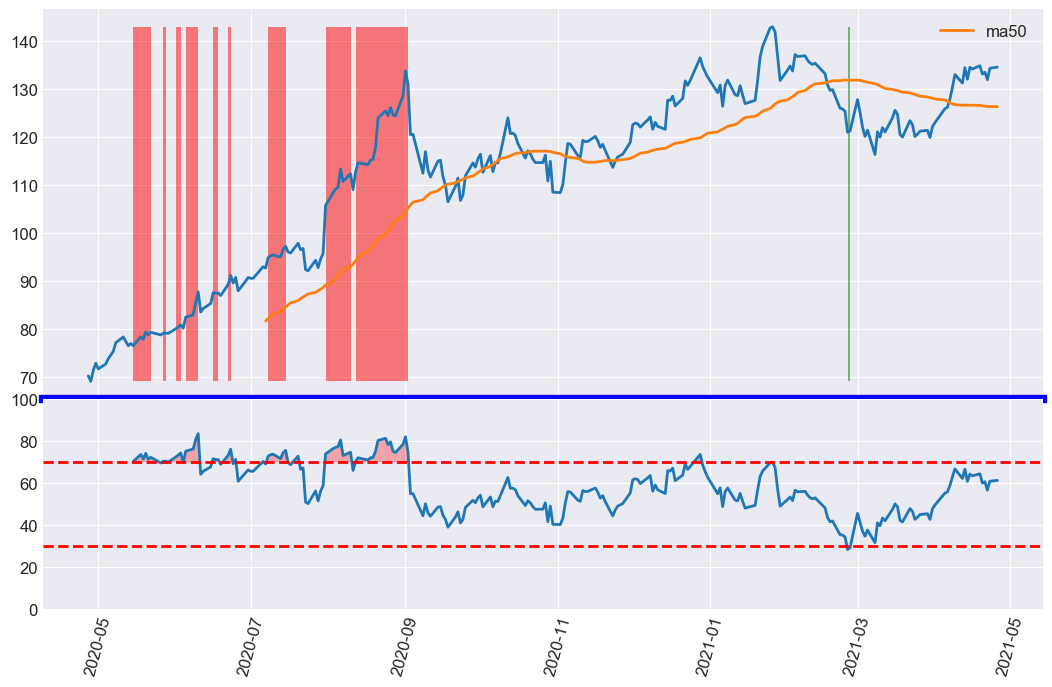

In [167]:
ti_plotter('aapl', period='1y', ma_period=[50], call_back=14)

In [7]:
df=get_data()
df=calc_rsi(df=df,call_back=call_back)
df=calc_mav(df=df,ma_period=ma_period)

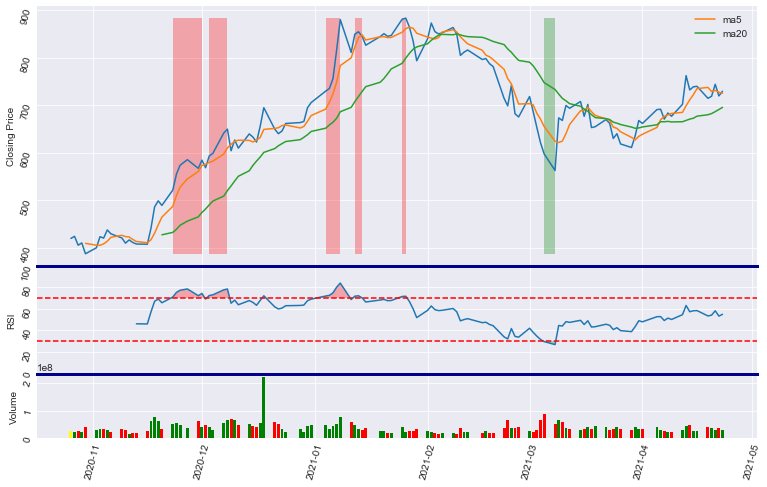

In [47]:
call_back=14
ma_period=[5,20]
vol=True
rsi=True
mav=True


plt.style.use('seaborn-darkgrid') #set chart style
fig = plt.figure(figsize=(10,6))  #figure size

#make layout
x_start=0
x_len=1

if (vol==True) & (rsi==True):
    #print('inside if 1')
    y_len_vol=0.15
    y_len_rsi=0.25
elif (vol==True) & (rsi==False):
    #print('inside if 2')
    y_len_vol=0.20
    y_len_rsi=0.0
elif (vol==False) & (rsi==True):
    #print('inside if 3')
    y_len_vol=0.0
    y_len_rsi=0.35
else:
    #print('inside if 4')
    y_len_vol=0.0
    y_len_rsi=0.0

y_len_main=1-y_len_rsi-y_len_vol    
y_start_vol=0
y_start_rsi=y_start_vol+y_len_vol
y_start_main=y_start_rsi+y_len_rsi

ax1 = fig.add_axes([x_start, y_start_main, x_len, y_len_main], axisbelow = True) #main chart
ax2 = fig.add_axes([x_start, y_start_rsi, x_len, y_len_rsi], sharex=ax1)       #rsi
ax3 = fig.add_axes([x_start, y_start_vol, x_len, y_len_vol], sharex=ax1)       #volume

#hide axis labels
def hide_ax(ax=ax1):
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off    
if y_start_main==0:
    hide_ax(ax2)
    hide_ax(ax3)
elif y_start_rsi==0:
    hide_ax(ax1)
    hide_ax(ax3)
elif y_start_vol==0:
    hide_ax(ax1)
    hide_ax(ax2)
#main plot
ax1.plot(df.Date,df.Close)
ax1.tick_params(rotation=75)
ax1.set_ylabel('Closing Price')

#add moving average
if mav==True:
    for period in ma_period:
        ma_name="ma"+str(period)
        ax1.plot(df.Date,df[ma_name], label=ma_name)
    ax1.legend()

#mark oversold over brought in main plot 
if rsi==True:
    ax1.fill_between(x=df.Date,y1=df.Close.min(), y2=df.Close.max(), where=df.rsi >70, alpha=0.3, facecolor='red')
    ax1.fill_between(x=df.Date,y1=df.Close.min(), y2=df.Close.max(), where=df.rsi <30, alpha=0.3, facecolor='green')

#set ylim
y_max=df.Close.max()
y_min=df.Close.min()
y_len=y_max-y_min
ax1.set_ylim(y_min-0.05*y_len,y_max+0.05*y_len)

#plotting rsi
if rsi==True:
    ax2.plot(df.Date, df.rsi)
    ax2.set_ylim(0,100)
    ax2.axhline(y=70, color='r', linestyle='--')
    ax2.axhline(y=30, color='r', linestyle='--')
    ax2.fill_between(x=df.Date, y1=df.rsi, y2=70, alpha=0.3, where=df.rsi>70,facecolor='red', interpolate=True)
    ax2.fill_between(x=df.Date, y1=df.rsi, y2=30, alpha=0.3, where=df.rsi<30,facecolor='green', interpolate=True)
    ax2.spines["top"].set_linewidth(3)
    ax2.spines["top"].set_color("darkblue")
    ax2.tick_params(rotation=75)
    ax2.set_ylabel('RSI')

#plotting volume
if vol==True:
    ax3.bar(df[df.delta>0].Date,df[df.delta>0].Volume, color='green')
    ax3.bar(df[df.delta<0].Date,df[df.delta<0].Volume, color='red')
    ax3.bar(df[df.delta==0].Date,df[df.delta==0].Volume, color='yellow')
    ax3.spines["top"].set_linewidth(3)
    ax3.spines["top"].set_color("darkblue")
    ax3.tick_params(rotation=75)
    ax3.set_ylabel('Volume')


plt.tight_layout()
plt.show()

In [170]:
df['l14']=df.Low.rolling(window=14).min()
df['h14']=df.High.rolling(window=14).max()
df['perc_k']=(df.Close-df.l14)/(df.h14-df.l14)*100
df['perc_d']=df.perc_k.rolling(window=3).mean()

In [171]:
df['sm_20']=df.Close.rolling(window=20).mean()
df['exp12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['exp26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['macd']=df.exp12-df.exp26


df['signal'] = df.macd.ewm(span=9, adjust=False).mean()
df['hist'] = df.macd - df.signal

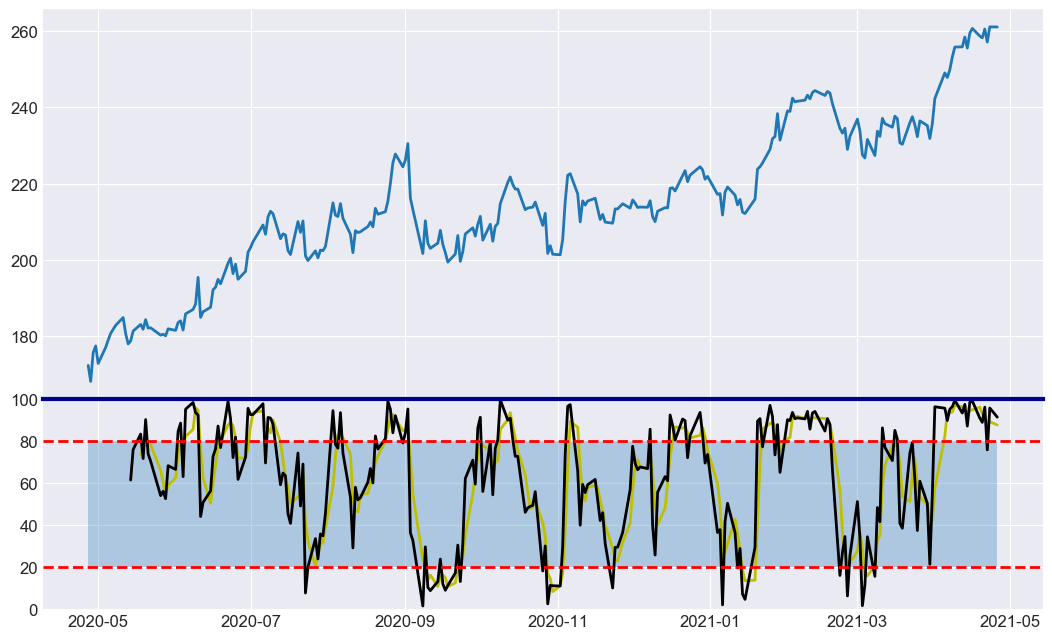

In [172]:
fig=plt.figure(figsize=(10,6))
ax1 = fig.add_axes([x_start, 0.35, x_len, 0.65], axisbelow = True) #main chart
ax2 = fig.add_axes([x_start, 0.00, x_len, 0.35], sharex=ax1)       #rsi

ax1.plot(df.index.values, df.Close)
ax2.plot(df.index.values, df.perc_d, color='y')
ax2.plot(df.index.values, df.perc_k, color='k')
ax2.axhline(y=80, color='r', linestyle='--')
ax2.axhline(y=20, color='r', linestyle='--')
ax2.set_ylim(0,100)
ax2.fill_between(df.index.values, 80,20, alpha=0.3)

ax2.spines["top"].set_linewidth(3)
ax2.spines["top"].set_color("darkblue")
plt.show()

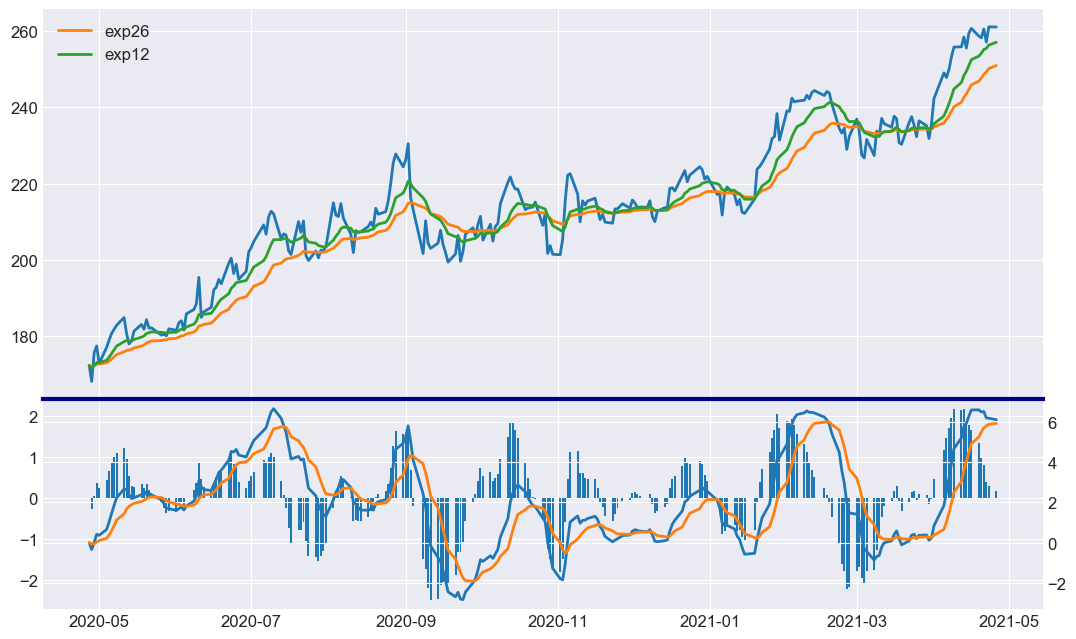

In [173]:
fig=plt.figure(figsize=(10,6))
ax1 = fig.add_axes([x_start, 0.35, x_len, 0.65], axisbelow = True) #main chart
ax2 = fig.add_axes([x_start, 0.00, x_len, 0.35], sharex=ax1)       #rsi

ax1.plot(df.index.values, df.Close)
ax1.plot(df.index.values, df.exp26, label='exp26')
ax1.plot(df.index.values, df.exp12, label='exp12')
ax1.legend()
ax3=ax2.twinx()
ax2.bar(df.index.values, df['hist'])
ax3.plot(df.index.values, df.macd)
ax3.plot(df.index.values, df.signal)

ax2.spines["top"].set_linewidth(3)
ax2.spines["top"].set_color("darkblue")
plt.show()

In [174]:
#df['sd']=df.Close.rolling(window=20).stdev()
df['sd']=df.Close.rolling(window=20).std()
df['bol_u']=df.Close+(2*df.sd)
df['bol_l']=df.Close-(2*df.sd)

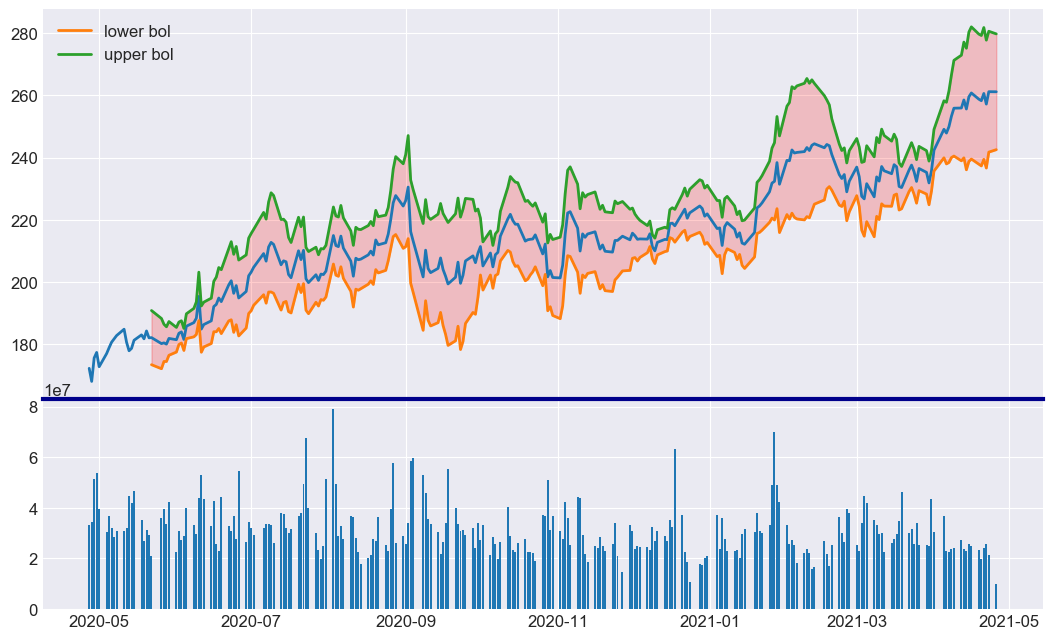

In [176]:
fig=plt.figure(figsize=(10,6))
ax1 = fig.add_axes([x_start, 0.35, x_len, 0.65], axisbelow = True) #main chart
ax2 = fig.add_axes([x_start, 0.00, x_len, 0.35], sharex=ax1)       #rsi

ax1.plot(df.index.values, df.Close)
ax1.plot(df.index.values, df.bol_l, label='lower bol')
ax1.plot(df.index.values, df.bol_u, label='upper bol')
ax1.fill_between(df.index.values, df.bol_l, df.bol_u, alpha=0.2, color='red')
ax1.legend()

ax2.bar(df.index.values, df.Volume)

ax2.spines["top"].set_linewidth(3)
ax2.spines["top"].set_color("darkblue")
plt.show()

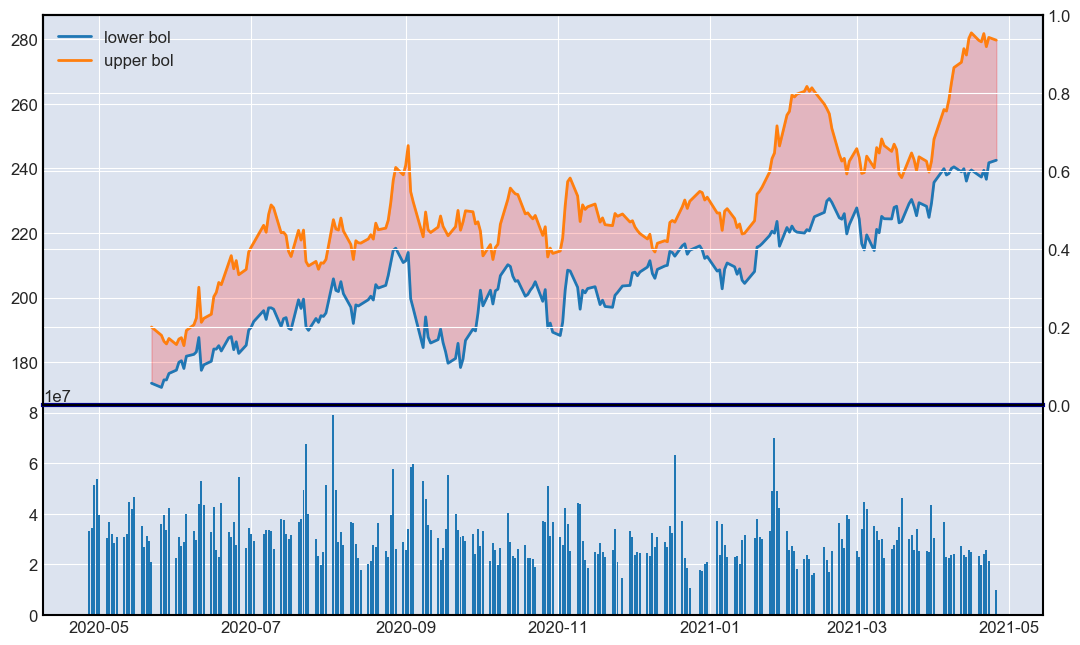

In [183]:
fig=plt.figure(figsize=(10,6))
ax1 = fig.add_axes([x_start, 0.35, x_len, 0.65], axisbelow = True) #main chart
ax2 = fig.add_axes([x_start, 0.00, x_len, 0.35], sharex=ax1)       #rsi

#ax1.plot(df.index.values, df.Close)
ax0=ax1.twinx()
candle=mpf.make_addplot(df.Close,type='line')
ax0=candle
ax1.plot(df.index.values, df.bol_l, label='lower bol')
ax1.plot(df.index.values, df.bol_u, label='upper bol')
ax1.fill_between(df.index.values, df.bol_l, df.bol_u, alpha=0.2, color='red')
ax1.legend()

ax2.bar(df.index.values, df.Volume)

ax2.spines["top"].set_linewidth(3)
ax2.spines["top"].set_color("darkblue")
plt.show()